In [7]:
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
resist="Resistència "
import os

if not os.path.exists("images"):
    os.mkdir("images")
import matplotlib.pyplot as plt


k=1.265569250534297


In [56]:
m100=pd.read_csv("Mag/P1/100.csv")
m200=pd.read_csv("Mag/P1/200.csv")
m300=pd.read_csv("Mag/P1/300.csv")
m400=pd.read_csv("Mag/P1/400.csv")
m440=pd.read_csv("Mag/P1/440.csv")
m550=pd.read_csv("Mag/P1/550.csv")
m700=pd.read_csv("Mag/P1/700.csv")
m750=pd.read_csv("Mag/P1/750.csv")

In [57]:
em =" (m)"
def funcio(fname,I):
    file=pd.read_csv(f"Mag/P1/{fname}.csv")
    file['X']=-file['X']/100+1/100
    file['Y']=file['Y']/100+1/100
    file['X^2']=file['X']**2
    file['Y^2']=file['Y']**2
    file['2Y']=2*file['Y'] #NO SE PQ COLLONS HI HE DE POSAR EL "-"
#     print(file['2Y'])
    file['X^2+Y^2']=file['X^2']+file['Y^2']
    f=px.scatter(file,x='2Y',y='X^2+Y^2',trendline="ols",template='simple_white')
    p= np.polyfit(file['X'], file['Y'], 2)
    f.update_xaxes(ticks="inside",
                mirror='ticks',showline=True,showgrid=True
                )
    f.update_yaxes(ticks="inside",
                mirror='ticks',showline=True,showgrid=True
                
                )
    f.update_layout(
        xaxis_title = r'$2y \textrm{ (m)}$',
        yaxis_title = r'$x^2+y^2 \textrm{ (m)}$',
    )
#                     xaxis_title=r'$2y$',
#                     yaxis_title=r'$x^2+y^2$')
    re= px.get_trendline_results(f)
    re= re.iloc[0]["px_fit_results"].summary()
    f.show()
    n=320
    r=0.068
    K=32*np.pi*n/(5*np.sqrt(5)*r)*10**(-7)
    B=K*I
#     print(p,B,sep='\n')
    fit_results = px.get_trendline_results(f).px_fit_results.iloc[0]
#     print(file['2Y'])
#     f.write_image("04.pdf",eingine="kaleido")
    f.write_image(f"lat/{fname}.pdf",engine="kaleido")

    return fit_results.params[1]



def funcio2(fname,I):
    file=pd.read_csv(f"Mag/P4/{fname}.csv")
    file['X']=-file['X']/100+1/100
    file['Y']=file['Y']/100+1/100
    file['X^2']=file['X']**2
    file['Y^2']=file['Y']**2
    file['2Y']=2*file['Y'] #NO SE PQ COLLONS HI HE DE POSAR EL "-"
#     print(file['2Y'])
    file['X^2+Y^2']=file['X^2']+file['Y^2']
    f=px.scatter(file,x='2Y',y='X^2+Y^2',trendline="ols")
    f.update_xaxes(ticks="inside",
                    mirror='ticks',showline=True,showgrid=True
                    )
    f.update_yaxes(ticks="inside",
                        mirror='ticks',showline=True,showgrid=True

                        )

    f.update_layout(
    xaxis_title=r'$2y\text{m)$',
    yaxis_title=r'$x^2+y^2\text{(m}^2)$'
    )
    p= np.polyfit(file['X'], file['Y'], 2)
    re= px.get_trendline_results(f)
    re= re.iloc[0]["px_fit_results"].summary()
    f.show()
    n=320
    r=0.068
    K=32*np.pi*n/(5*np.sqrt(5)*r)*10**(-7)
    B=K*I
#     print(p,B,sep='\n')
    fit_results = px.get_trendline_results(f).px_fit_results.iloc[0]
#     print(file['2Y'])

    return fit_results.params[1]


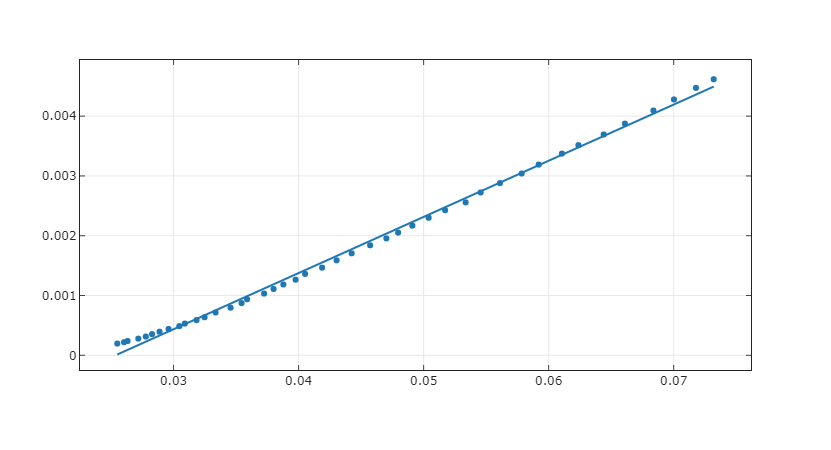

0.09393562900314067

In [58]:
Is=[0.1,0.2,0.3,0.4,0.44,0.55,0.7,0.75]
files=['100','200','300','400','440','550','700','750']
funcio(files[3],0.4)

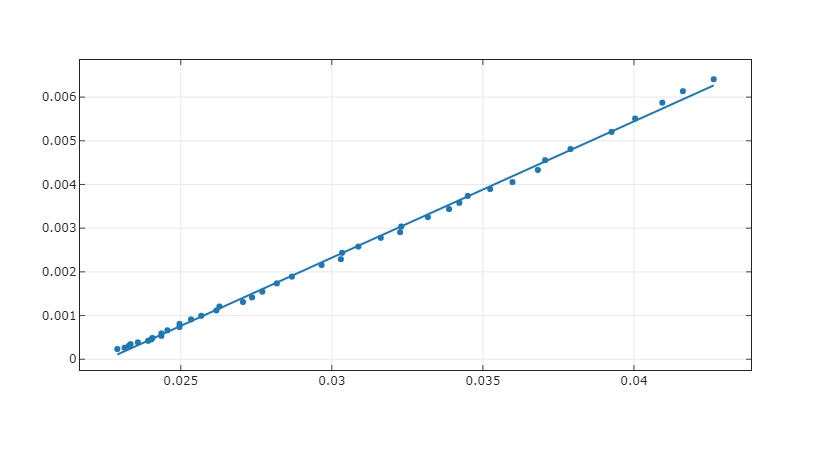

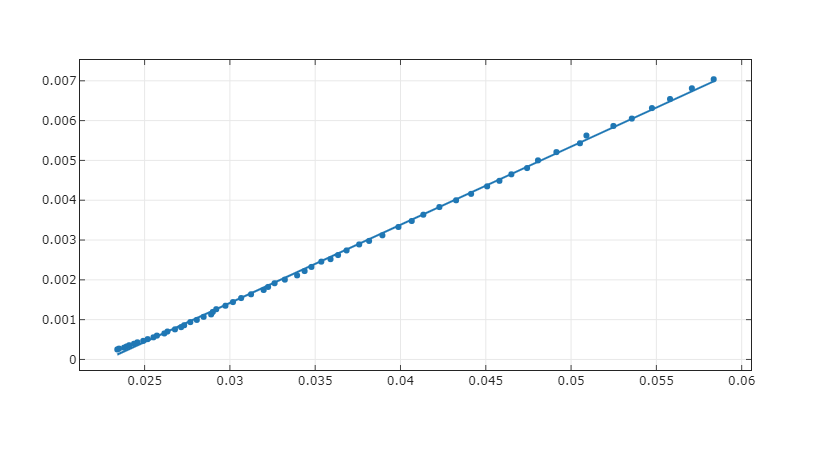

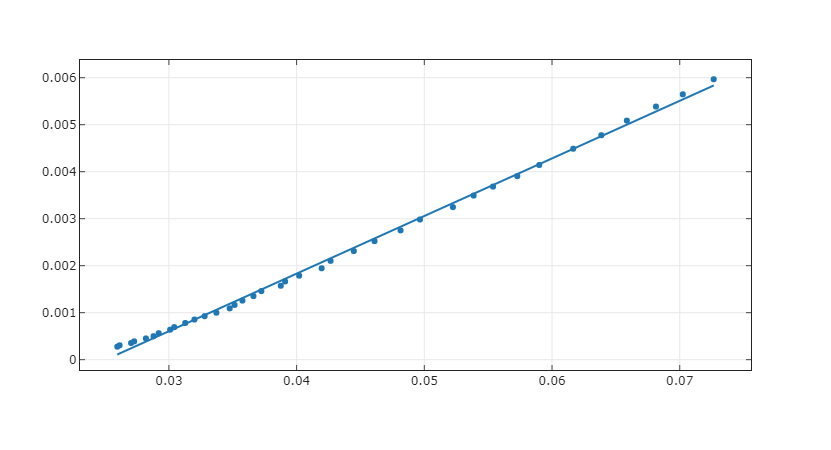

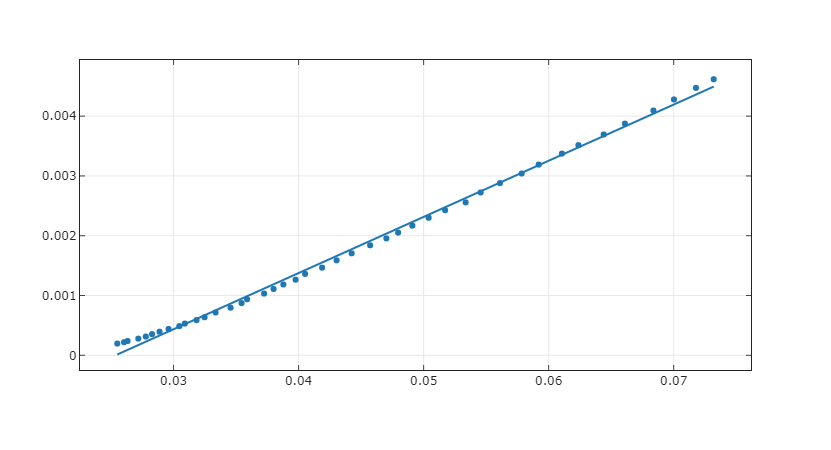

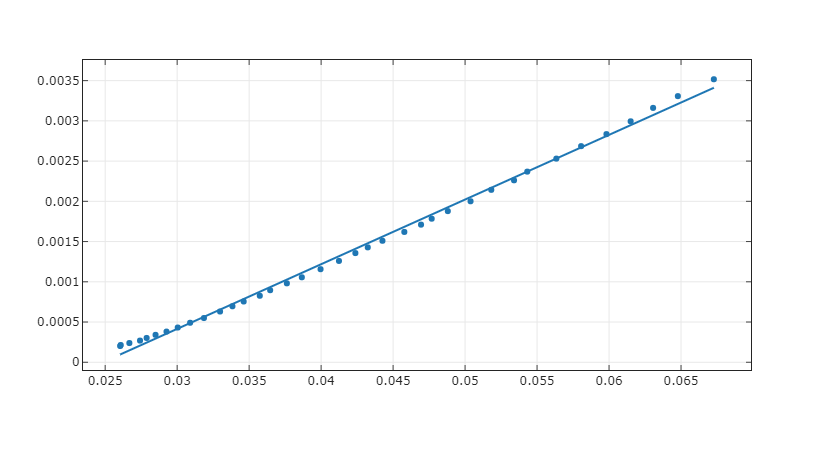

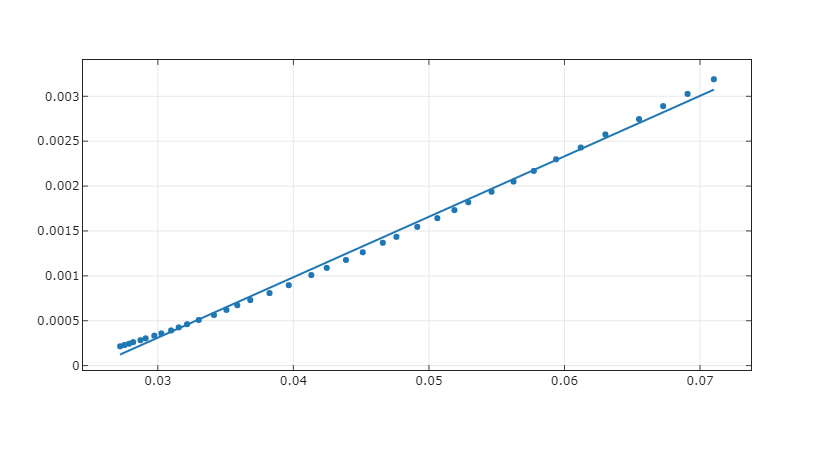

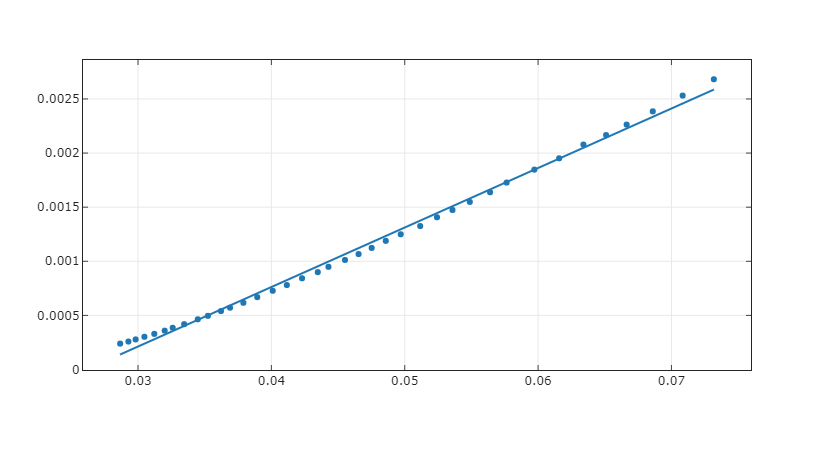

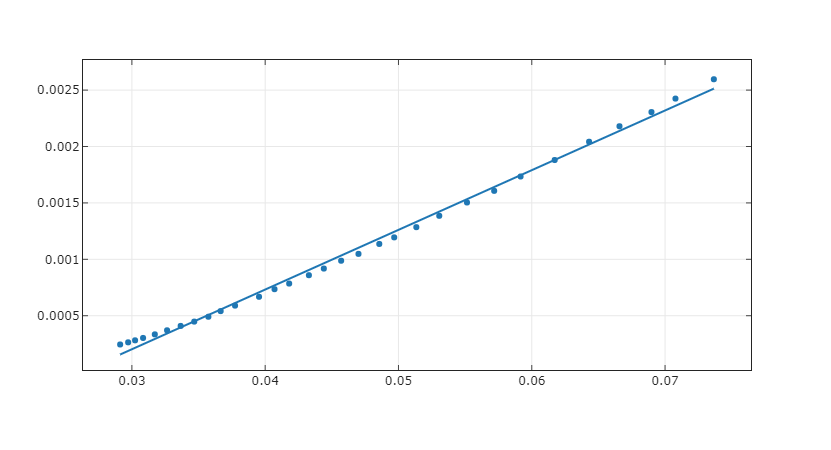

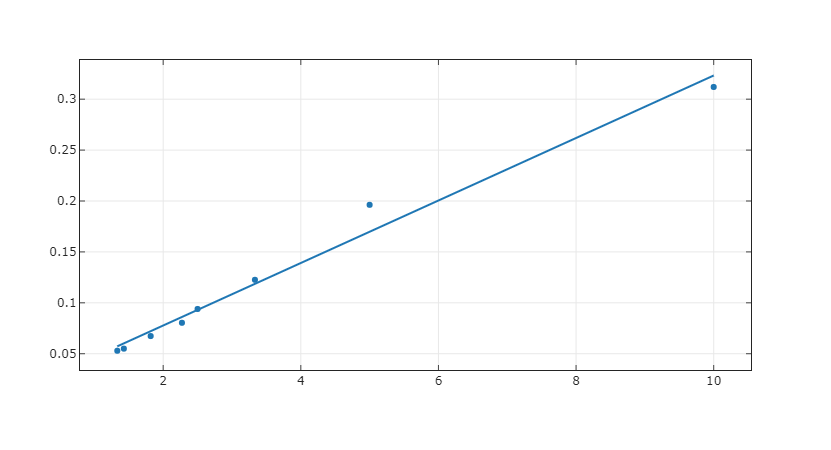

[0.00719062 0.00163544] [0.01632187 0.03069403]


/opt/conda/lib/python3.8/site-packages/scipy/stats/stats.py:1603: UserWarning:

kurtosistest only valid for n>=20 ... continuing anyway, n=8



<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.983
Model:                            OLS   Adj. R-squared:                  0.980
Method:                 Least Squares   F-statistic:                     352.2
Date:                Sun, 30 May 2021   Prob (F-statistic):           1.48e-06
Time:                        16:52:47   Log-Likelihood:                 24.827
No. Observations:                   8   AIC:                            -45.65
Df Residuals:                       6   BIC:                            -45.50
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0163      0.007      2.270      0.064      -0.001       0.034
x1             0.0307      0.002     18.768      0.000       0.027       0.035
==============================================================================
Omnibus:                       12.398   Durbin-Watson:                   2.102
Prob(Omnibus):                  0.002   Jarque-Bera (JB):                4.314
Skew:                           1.620   Prob(JB):                        0.116
Kurtosis:                       4.563   Cond. No.                         7.36
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [60]:
Is=[0.1,0.2,0.3,0.4,0.44,0.55,0.7,0.75]
files=['100','200','300','400','440','550','700','750']
m=[]
for i in range(len(Is)):
    m.append(funcio(files[i],Is[i]))
Ip=np.array(Is)
Ip=1/(Ip)
R=m
# fig=px.scatter(x=Ip,y=m,trendline='ols',template='simple_white')
# fig.update_layout(
#         xaxis_title = r'$I_p^{-1} \textrm{ (A)}^{-1}$',
#         yaxis_title = r'$R \textrm{ (m)}$',
#     )
# fig.show()

# ,error_x=data["incz"],error_y=data["IncB"]
fig=px.scatter(x=Ip,y=m,template='simple_white',trendline='ols')
   
fig.update_xaxes(ticks="inside",
                    mirror='ticks',showline=True,showgrid=True
                    )
fig.update_yaxes(ticks="inside",
                    mirror='ticks',showline=True,showgrid=True

                    )

fig.update_layout(
xaxis_title=r'$I^{-1}\text{ (A}^{-1})$',
yaxis_title=r'$R\text{ (m)}$'
)


fig.show()
fig.write_image("mag1.pdf",engine="kaleido")

ree= px.get_trendline_results(fig)
re= ree.iloc[0]["px_fit_results"].summary()

fit_results = px.get_trendline_results(fig).px_fit_results.iloc[0]

u=fit_results.bse
m=fit_results.params
print(u,m)
re


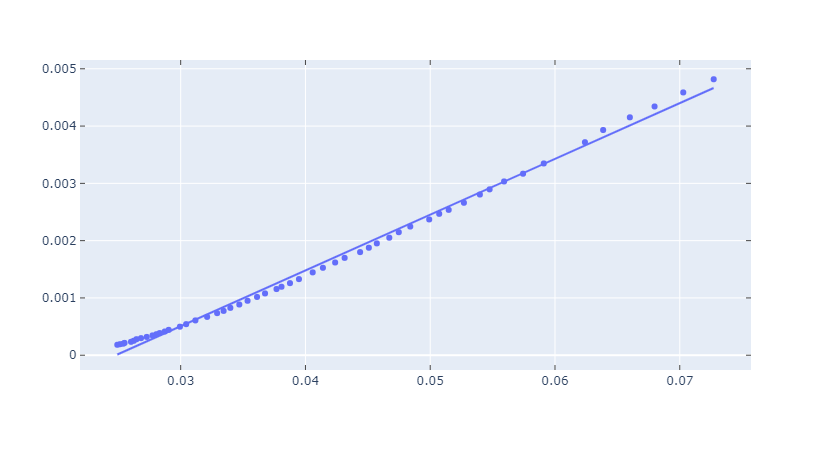

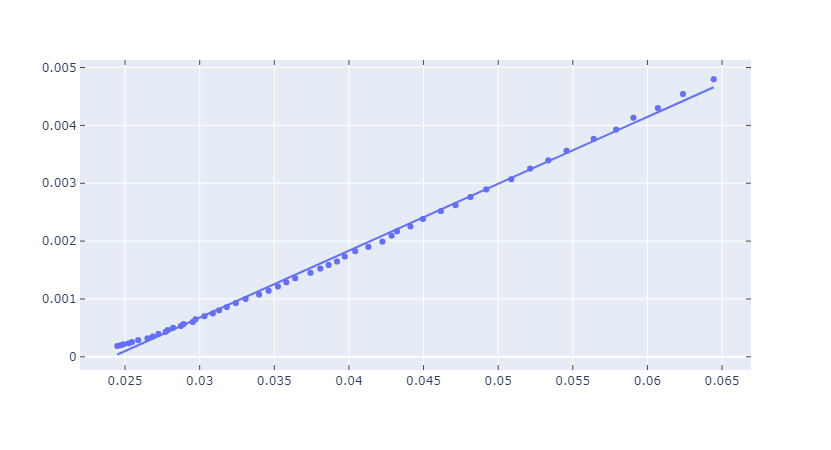

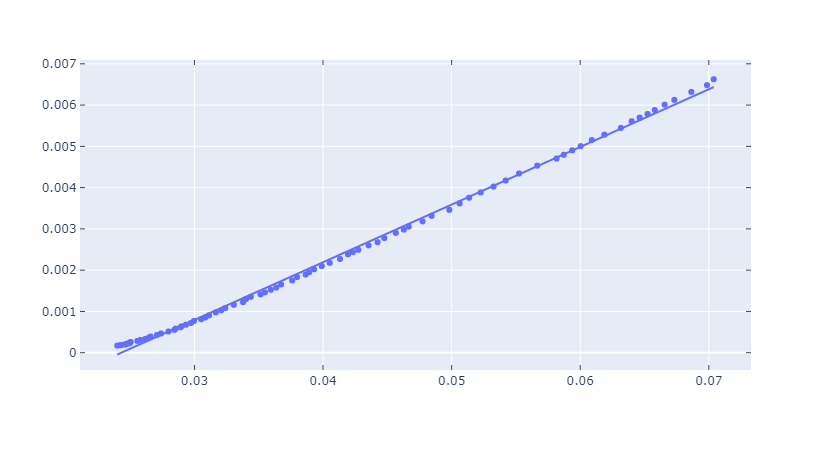

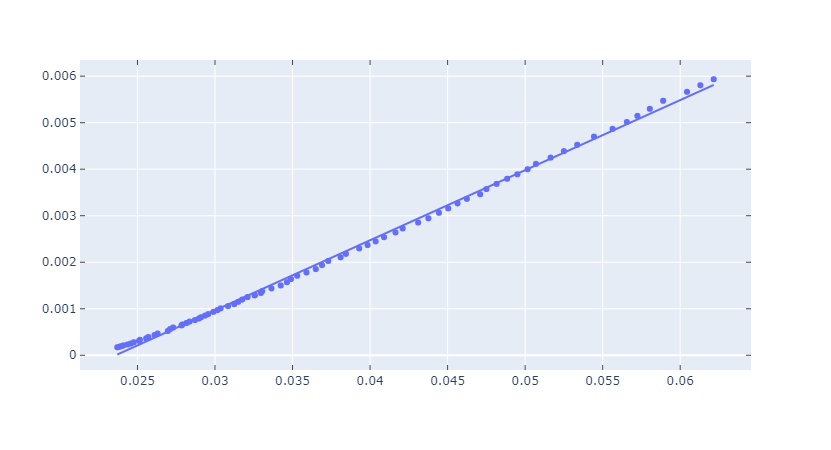

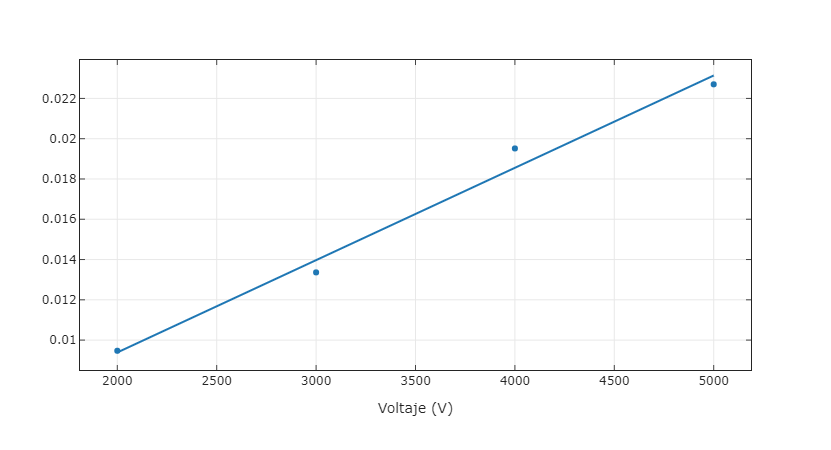

[1.42043955e-03 3.86594678e-07] [2.17419373e-04 4.58412810e-06]


/opt/conda/lib/python3.8/site-packages/statsmodels/stats/stattools.py:74: ValueWarning:

omni_normtest is not valid with less than 8 observations; 4 samples were given.



<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.986
Model:                            OLS   Adj. R-squared:                  0.979
Method:                 Least Squares   F-statistic:                     140.6
Date:                Sun, 30 May 2021   Prob (F-statistic):            0.00704
Time:                        16:53:49   Log-Likelihood:                 23.924
No. Observations:                   4   AIC:                            -43.85
Df Residuals:                       2   BIC:                            -45.08
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0002      0.001      0.153      0.892      -0.006       0.006
x1          4.584e-06   3.87e-07     11.858      0.007    2.92e-06    6.25e-06
==============================================================================
Omnibus:                          nan   Durbin-Watson:                   3.283
Prob(Omnibus):                    nan   Jarque-Bera (JB):                0.493
Skew:                           0.636   Prob(JB):                        0.782
Kurtosis:                       1.844   Cond. No.                     1.21e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.21e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [61]:
Vs=[2000,3000,4000,5000]
files=['2kv','3kv','4kv','5kv']
m=[]
for i in range(len(Vs)):
    m.append(funcio2(files[i],Vs[i]))
VVs=np.array(Vs)

# Ip=np.sqrt(Ip)
m=np.array(m)**2
R=m
fig=px.scatter(x=VVs,y=m,trendline='ols',template="simple_white")
   
fig.update_xaxes(ticks="inside",
                    mirror='ticks',showline=True,showgrid=True
                    )
fig.update_yaxes(ticks="inside",
                    mirror='ticks',showline=True,showgrid=True

                    )

fig.update_layout(
xaxis_title='Voltaje (V)',
yaxis_title=r'$R^2\text{ (m}^2)$'
)
fig.show()
ree= px.get_trendline_results(fig)
re= ree.iloc[0]["px_fit_results"].summary()

fit_results = px.get_trendline_results(fig).px_fit_results.iloc[0]
fig.write_image("vr.pdf",engine="kaleido")

u=fit_results.bse
m=fit_results.params
print(u,m)
re

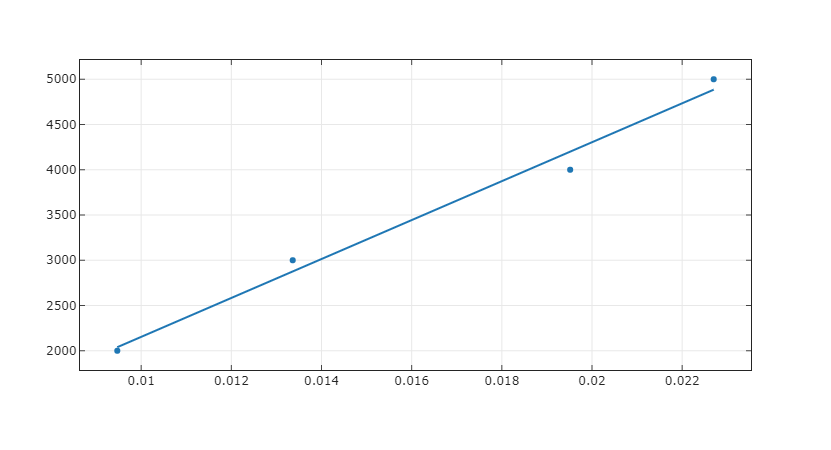

266946939560.023 29403634005.891743


/opt/conda/lib/python3.8/site-packages/statsmodels/stats/stattools.py:74: ValueWarning:

omni_normtest is not valid with less than 8 observations; 4 samples were given.



In [86]:
fig=px.scatter(x=R,y=Vs,trendline='ols',template="simple_white")
   
fig.update_xaxes(ticks="inside",
                    mirror='ticks',showline=True,showgrid=True
                    )
fig.update_yaxes(ticks="inside",
                    mirror='ticks',showline=True,showgrid=True
                    )
fig.update_layout(
xaxis_title=r'$V\text{ (V})$',
yaxis_title=r'$R^2\text{ (m}^2)$'
)
fig.show()
ree= px.get_trendline_results(fig)
re= ree.iloc[0]["px_fit_results"].summary()

fit_results = px.get_trendline_results(fig).px_fit_results.iloc[0]

u=fit_results.bse
m=fit_results.params

n=320
r=0.068
uIA=0.01
Ia=0.3
# B=32*np.pi*n*Ia/(5*np.sqrt(5)*r)*4*10**(-7)
K=32*np.pi*n/(5*np.sqrt(5)*r)*10**(-7)
uK=np.sqrt((32*np.pi*n*Ia/(5*np.sqrt(5)*r)*4*10**(-7)*0.01)**2)
B=K*Ia
uB=np.sqrt(uK**2*Ia**2+uIA**2*K**2)
# qm=m[1]*2/B**2
qm=2*m[1]/B**2
uqm=np.sqrt(u[1]**2*(2/B**2)**2+uB**2*(4*m[1]/B**3)**2)
# print(u,m)
print(qm,uqm)

In [84]:
K

0.004231417814462178

In [16]:
I=np.array(Is)
n=320
r=0.068
B=32*np.pi*n*I/(5*np.sqrt(5)*r)*4*np.pi*10**(-7)




# fig=px.scatter(x=1/B,y=R,trendline='ols',template="simple_white")
   
# fig.update_xaxes(ticks="inside",
#                     mirror='ticks',showline=True,showgrid=True
#                     )
# fig.update_yaxes(ticks="inside",
#                     mirror='ticks',showline=True,showgrid=True

#                     )
